<a href="https://colab.research.google.com/github/kainat-Baloch/AI_Project22/blob/main/project_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas
import matplotlib.pyplot as plt

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



In [2]:
#importing data File
dataset = pandas.read_csv('/content/project-data-2years.csv', usecols=[3], engine='python')
dataset.head()

,y
0,2628
1,2874
2,2856
3,2594
4,2568


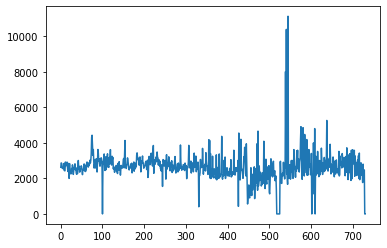

In [3]:
plt.plot(dataset)
plt.show()

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
dataframe = pandas.read_csv('/content/project-data-2years.csv', usecols=[3], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset.shape

(731, 1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


489 242


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
487/487 - 2s - loss: 0.0103
Epoch 2/50
487/487 - 0s - loss: 0.0026
Epoch 3/50
487/487 - 0s - loss: 0.0025
Epoch 4/50
487/487 - 0s - loss: 0.0026
Epoch 5/50
487/487 - 0s - loss: 0.0026
Epoch 6/50
487/487 - 0s - loss: 0.0025
Epoch 7/50
487/487 - 0s - loss: 0.0025
Epoch 8/50
487/487 - 0s - loss: 0.0026
Epoch 9/50
487/487 - 0s - loss: 0.0025
Epoch 10/50
487/487 - 0s - loss: 0.0025
Epoch 11/50
487/487 - 0s - loss: 0.0025
Epoch 12/50
487/487 - 0s - loss: 0.0025
Epoch 13/50
487/487 - 0s - loss: 0.0025
Epoch 14/50
487/487 - 0s - loss: 0.0025
Epoch 15/50
487/487 - 0s - loss: 0.0025
Epoch 16/50
487/487 - 0s - loss: 0.0025
Epoch 17/50
487/487 - 0s - loss: 0.0025
Epoch 18/50
487/487 - 0s - loss: 0.0025
Epoch 19/50
487/487 - 0s - loss: 0.0025
Epoch 20/50
487/487 - 0s - loss: 0.0025
Epoch 21/50
487/487 - 0s - loss: 0.0025
Epoch 22/50
487/487 - 0s - loss: 0.0025
Epoch 23/50
487/487 - 0s - loss: 0.0025
Epoch 24/50
487/487 - 0s - loss: 0.0025
Epoch 25/50
487/487 - 0s - loss: 0.0025
Epoch 26/

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [13]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 555.86 RMSE
Test Score: 1176.44 RMSE


In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

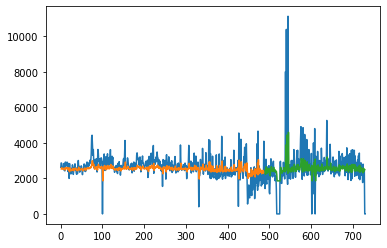

In [15]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()